Las muestras llegan periódicamente a medida que el Dr. Wolberg informa de sus casos clínicos. Por lo tanto, la base de datos refleja esta agrupación cronológica de los datos. Esta información de agrupación aparece inmediatamente debajo, habiéndose eliminado de los propios datos:

Grupo 1: 367 instancias (enero de 1989)<br>
Grupo 2: 70 casos (octubre de 1989)<br>
Grupo 3: 31 casos (febrero de 1990)<br>
Grupo 4: 17 casos (abril de 1990)<br>
Grupo 5: 48 casos (agosto de 1990)<br>
Grupo 6: 49 casos (actualizado en enero de 1991)<br>
Grupo 7: 31 casos (junio de 1991)<br>
Grupo 8: 86 casos (noviembre de 1991)<br>

Total: 699 puntos (a partir de la base de datos donada el 15 de julio de 1992)

Tenga en cuenta que los resultados resumidos anteriormente en Uso anterior se refieren a un conjunto de datos de tamaño 369, mientras que el Grupo 1 tiene solo 367 instancias. Esto se debe a que originalmente contenía 369 instancias; Se eliminaron 2. Las siguientes declaraciones resumen los cambios en el conjunto de datos del Grupo 1 original:

Grupo 1 : 367 puntos: 200B 167M (enero de 1989)

Revisado el 10 de enero de 1991: Se reemplazaron los núcleos desnudos cero en 1080185 y 1187805

Revisado el 22 de noviembre de 1991: Eliminado 765878,4,5,9,7,10,10,10,3,8,1 sin registro
: Eliminado 484201,2,7,8,8,4,3,10,3,4,1 cero epitelial
: Se ha cambiado de 0 a 1 en el campo 6 del 1219406 de muestra
: Se cambió 0 a 1 en el campo 8 de la siguiente muestra:
: 1182404,2,3,1,1,1,2,0,1,1,1

¿Faltan valores?

Sí

Información adicional de las variables

1. Número de código de muestra: número de identificación
2. Espesor del grupo: 1 - 10
3. Uniformidad del tamaño de la celda: 1 - 10
4. Uniformidad de la forma de la celda: 1 - 10
5. Adherencia marginal: 1 - 10
6. Tamaño de célula epitelial única: 1 - 10
7. Núcleos desnudos: 1 - 10
8. Cromatina blanda: 1 - 10
9. Nucleolos normales: 1 - 10
10. Mitosis: 1 - 10
11. Clase: (2 para benigno, 4 para maligno)

Etiquetas de clase

2 = benigno, 4 = maligno
# Importar Librerias

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar conjuntos de datos

In [45]:
# Lista de nombres de columnas
column_names = [
    'ID',
    'Clump Thickness',
    'Uniformity of Cell Size',
    'Uniformity of Cell Shape',
    'Marginal Adhesion',
    'Single Epithelial Cell Size',
    'Bare Nuclei',
    'Bland Chromatin',
    'Normal Nucleoli',
    'Mitoses',
    'Class'
]

In [46]:
df = pd.read_csv("./breast-cancer-wisconsin.data", names=column_names)
df.head()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [47]:

df.info()
df['Bare Nuclei'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


Bare Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64

In [48]:
df_copy = df.copy()

Limpiar y convertir datos

In [49]:
# Realizar actualizaciones específicas en el conjunto de datos según las instrucciones

# 1. Reemplazar los valores de "núcleos desnudos" en las muestras 1080185 y 1187805
df_copy.loc[df_copy['ID'] == 1080185, 'Bare Nuclei'] = 1
df_copy.loc[df_copy['ID'] == 1187805, 'Bare Nuclei'] = 1

# 2. Eliminar las muestras con los números 765878 y 484201
df_copy = df_copy[~df_copy['ID'].isin([765878, 484201])]

# 3. Actualizar el valor en el campo 6 de la muestra 1219406 de 0 a 1
df_copy.loc[df_copy['ID'] == 1219406, 'Single Epithelial Cell Size'] = 1

# 4. Actualizar el valor en el campo 8 de la muestra 1182404 de 0 a 1
df_copy.loc[df_copy['ID'] == 1182404, 'Bland Chromatin'] = 1

# Verificar los cambios realizados
df_copy.loc[df_copy['ID'].isin([1080185, 1187805, 1219406, 1182404])]

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
36,1080185,10,10,10,8,6,1,8,9,1,4
136,1182404,4,1,1,1,2,1,1,1,1,2
149,1187805,8,8,7,4,10,1,7,8,7,4
209,1219406,5,1,1,1,1,1,3,1,1,2
256,1182404,3,1,1,1,2,1,1,1,1,2
257,1182404,3,1,1,1,2,1,1,1,1,2
265,1182404,5,1,4,1,2,1,1,2,1,2
448,1182404,1,1,1,1,1,1,1,1,1,2
497,1182404,4,2,1,1,2,1,1,1,1,2


In [50]:
df_copy['Bare Nuclei'] = pd.to_numeric(df_copy['Bare Nuclei'], errors='coerce', downcast='integer')
df_copy.dropna(inplace=True)  # Eliminar filas con valores faltantes

# Mostrar información sobre los datos limpios
df_copy.info()
df_copy['Bare Nuclei'].value_counts()


<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           683 non-null    int64  
 1   Clump Thickness              683 non-null    int64  
 2   Uniformity of Cell Size      683 non-null    int64  
 3   Uniformity of Cell Shape     683 non-null    int64  
 4   Marginal Adhesion            683 non-null    int64  
 5   Single Epithelial Cell Size  683 non-null    int64  
 6   Bare Nuclei                  683 non-null    float64
 7   Bland Chromatin              683 non-null    int64  
 8   Normal Nucleoli              683 non-null    int64  
 9   Mitoses                      683 non-null    int64  
 10  Class                        683 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 64.0 KB


Bare Nuclei
1.0     403
10.0    131
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: count, dtype: int64

In [51]:
df_copy['Bare Nuclei'] = pd.to_numeric(df_copy['Bare Nuclei'], errors='coerce', downcast='integer')
df_copy['Bare Nuclei'].value_counts()

Bare Nuclei
1     403
10    131
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: count, dtype: int64

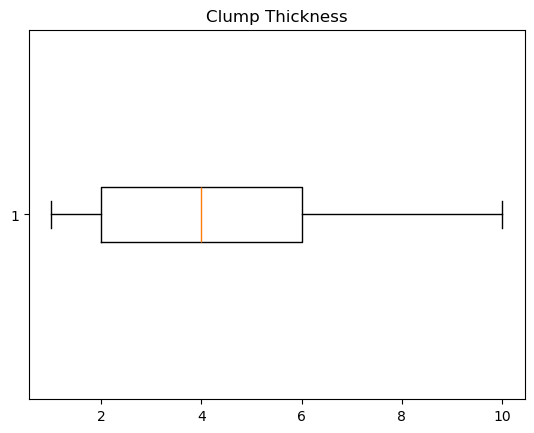

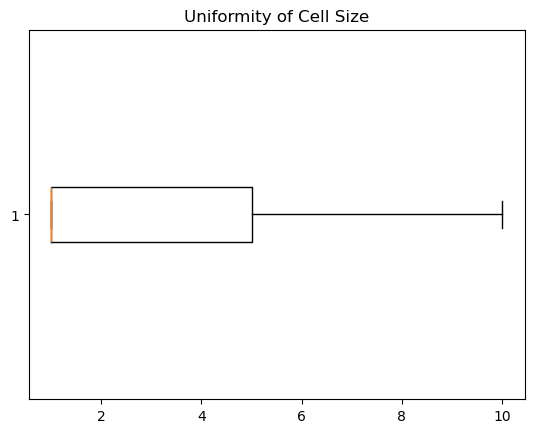

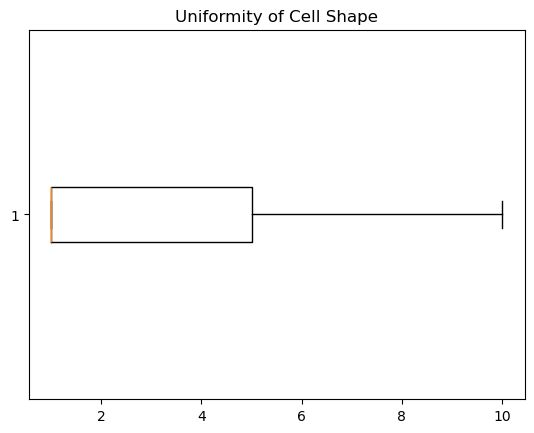

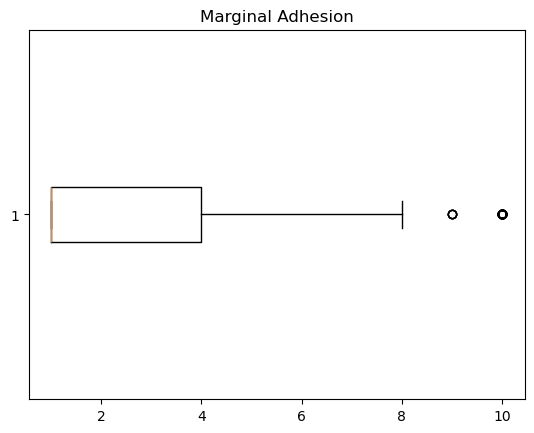

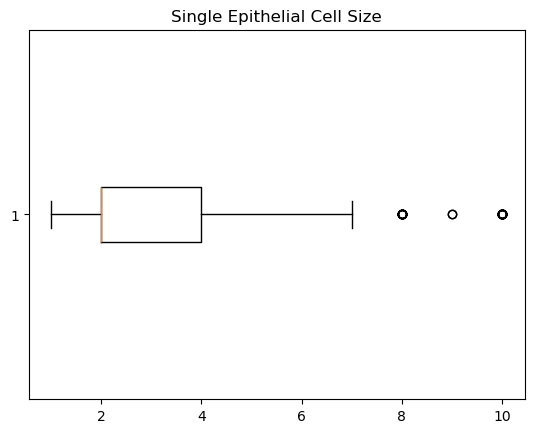

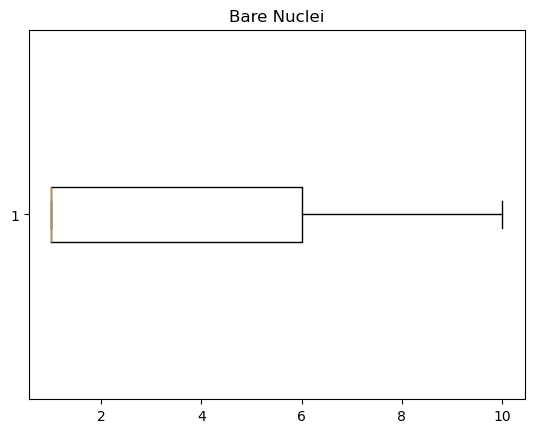

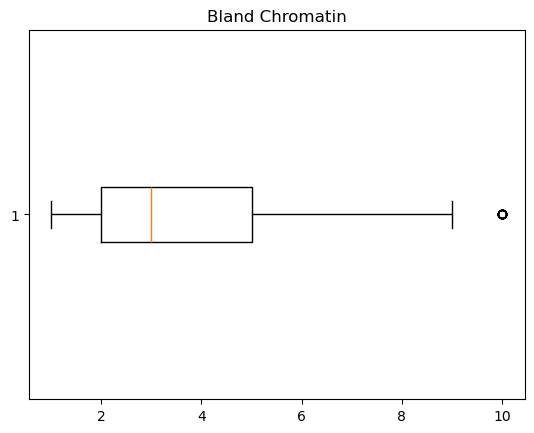

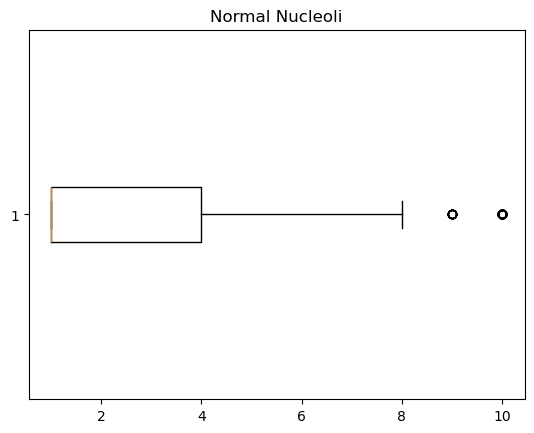

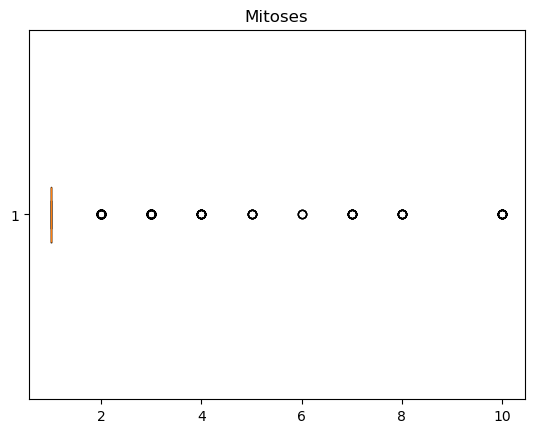

In [52]:
plt.boxplot(df_copy['Clump Thickness'], vert= False)
plt.title('Clump Thickness')
plt.show()

plt.boxplot(df_copy['Uniformity of Cell Size'], vert= False)
plt.title('Uniformity of Cell Size')
plt.show()

plt.boxplot(df_copy['Uniformity of Cell Shape'], vert= False)
plt.title('Uniformity of Cell Shape')
plt.show()

plt.boxplot(df_copy['Marginal Adhesion'], vert= False)
plt.title('Marginal Adhesion')
plt.show()

plt.boxplot(df_copy['Single Epithelial Cell Size'], vert= False)
plt.title('Single Epithelial Cell Size')
plt.show()

plt.boxplot(df_copy['Bare Nuclei'], vert= False)
plt.title('Bare Nuclei')
plt.show()

plt.boxplot(df_copy['Bland Chromatin'], vert= False)
plt.title('Bland Chromatin')
plt.show()

plt.boxplot(df_copy['Normal Nucleoli'], vert= False)
plt.title('Normal Nucleoli')
plt.show()

plt.boxplot(df_copy['Mitoses'], vert= False)
plt.title('Mitoses')
plt.show()

In [53]:
print(df_copy['Mitoses'].values)
print(df_copy['Mitoses'].value_counts())
df_copy['Mitoses'].describe()

[ 1  1  1  1  1  1  1  1  5  1  1  1  1  1  4  1  1  1  2  1  4  1  1  1
  1  1  1  1  1  1  1  3  1  1  1  1  1  1  1  2  3  1  1  2  1  1  1  2
  5  1  2  7  1  1  1  4  1  1  1  1  1  1  1 10  1  1  8  1  1 10  1  1
  3  1  1  1  1  1  1  1  1  1  7 10  1  3  1  1  1  1  1  1  1  1  1  1
 10  4  2  1  1  1  8  7  1  1  1  3  2  1  3  1  1  1  1  8  1  1  1  1
  3  1  1  1  5  1  2  1  1  1  3  1  1  1  1  1  1  1  1  3  1  1  1  1
  1  7  1  3  1  1  1  1  1  1  6  2  1  1  7  1  3 10  1  1  1  1  1  7
  1  1  1  3  1  1  1  1  1  1  1  1  1 10  1  1  1  3  1  1  1  1  2  1
  1  1  3  1  1  1  1  5  1  1  1  1  6  1  1  4  1  2  1  1  2  1  1  1
  1  1  2  1  1  1  1  1  1  2  1  1  1 10  4 10  2  1  1  1  1  1  1  1
  1  1  1  3  3  3  1  1  1  1  1  1  3  5  1  1  3  1  2  1  8  1  2  1
  1  1  1  1  1  1  8  1  1  1  1  2  3 10  1  1  4  1  1  1  1  1  1  2
  1  1 10  1  1  4  1  1  4  1  1  1  1  1  1  1  1  1  1  6  1  1  1  1
  1  1  1  1  1  2  1  1  2  1  1  1  1  1  1  1  1

count    683.000000
mean       1.603221
std        1.732674
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       10.000000
Name: Mitoses, dtype: float64

In [54]:
df_copy2 = df_copy.copy()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1
 1 1 2 3 1 1 2 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1
 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 3 2 1 3
 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 2 1 1 1 3 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 3
 1 1 1 1 1 1 1 2 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1
 3 1 1 1 1 2 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 3 3 3 1 1 1 1 1 1 3 1 1 1 3 1 2
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 3 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 3 1 1
 1 1 1 1 1 1 1 1 1 3 1 3 3 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 3 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

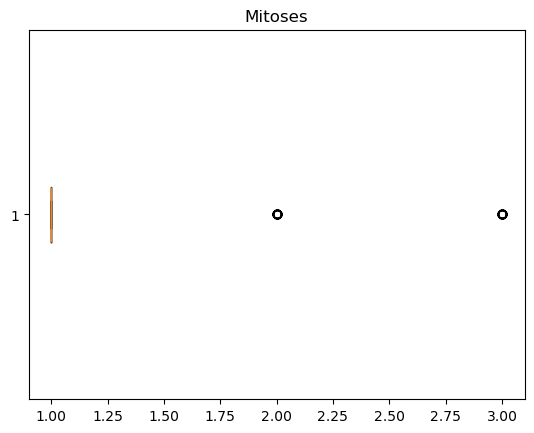

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   ID                           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int8 
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(10), int8(1)
memory usage: 59.4 KB


In [55]:
# Asignar la mediana a los datos atípicos en la columna 'mitosis' en df_copy
def replace_outliers(value):
    if value > 3:
        return int(df_copy2['Mitoses'].mean())
    return value

df_copy2['Mitoses'] = df_copy2['Mitoses'].apply(replace_outliers)

# Verificar si los valores atípicos han sido reemplazados
print(df_copy2['Mitoses'].values)
plt.boxplot(df_copy2['Mitoses'], vert=False)
plt.title('Mitoses')
plt.show()
df_copy2.info()



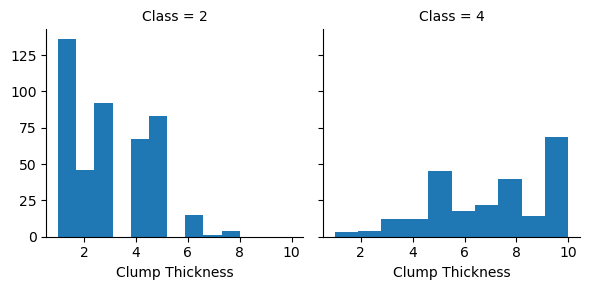

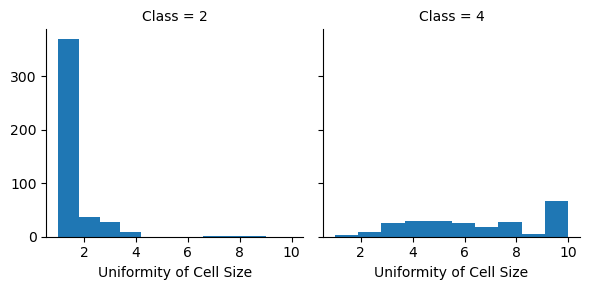

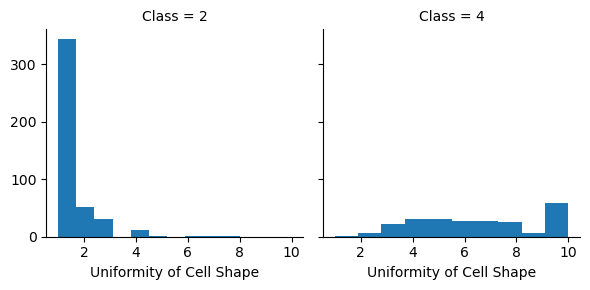

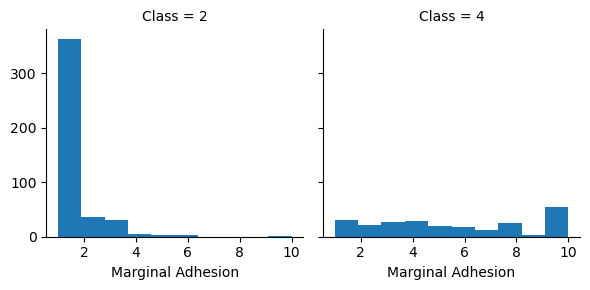

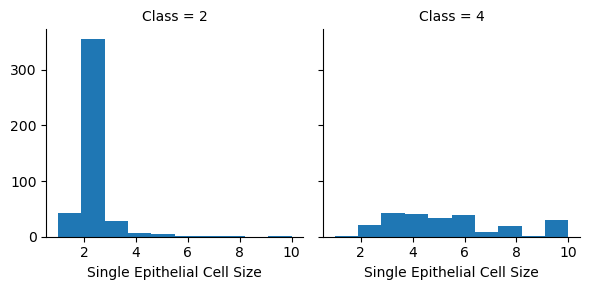

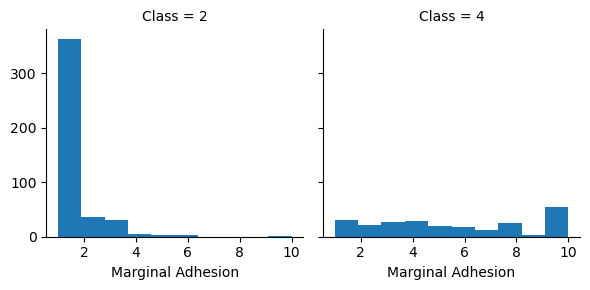

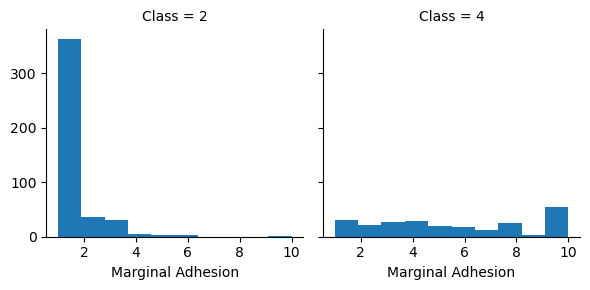

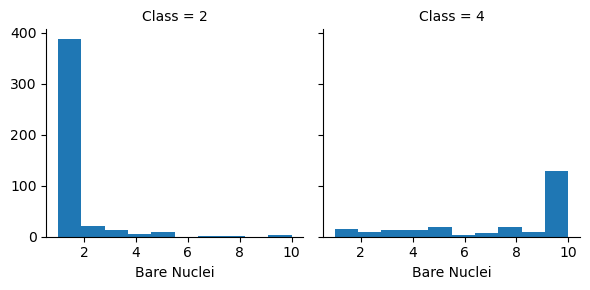

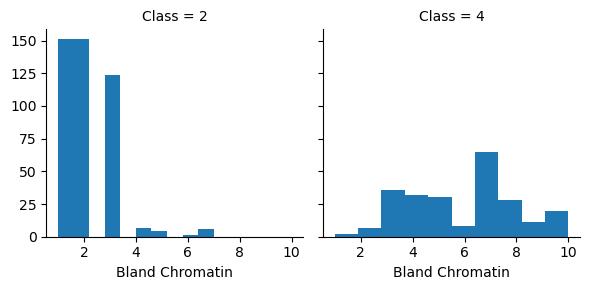

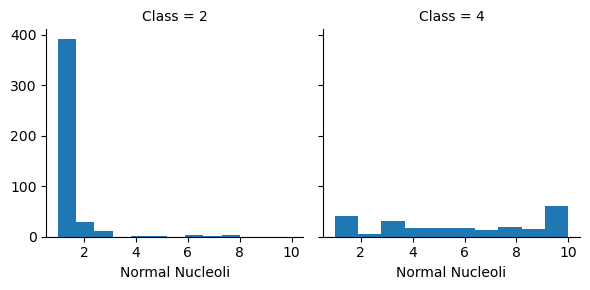

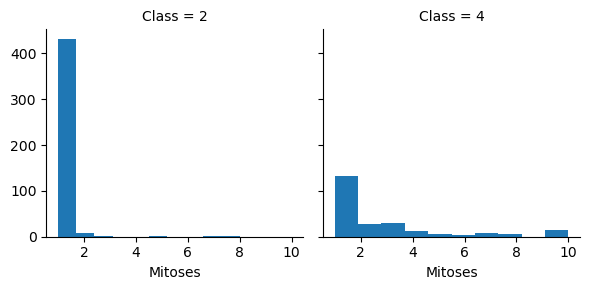

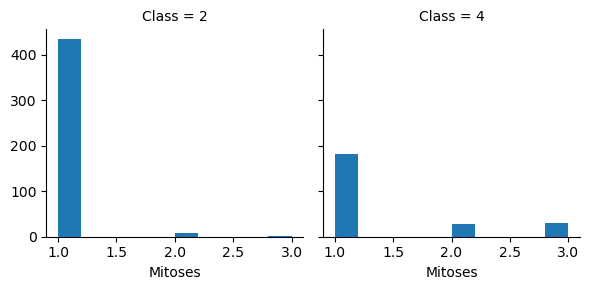

In [56]:
hist = sns.FacetGrid(df_copy2, col= 'Class')
hist.map(plt.hist, 'Clump Thickness', bins = 10)

hist = sns.FacetGrid(df_copy2, col= 'Class')
hist.map(plt.hist, 'Uniformity of Cell Size', bins = 10)

hist = sns.FacetGrid(df_copy2, col= 'Class')
hist.map(plt.hist, 'Uniformity of Cell Shape', bins = 10)

hist = sns.FacetGrid(df_copy2, col= 'Class')
hist.map(plt.hist, 'Marginal Adhesion', bins = 10)

hist = sns.FacetGrid(df_copy2, col= 'Class')
hist.map(plt.hist, 'Single Epithelial Cell Size', bins = 10)

hist = sns.FacetGrid(df_copy2, col= 'Class')
hist.map(plt.hist, 'Marginal Adhesion', bins = 10)

hist = sns.FacetGrid(df_copy2, col= 'Class')
hist.map(plt.hist, 'Marginal Adhesion', bins = 10)

hist = sns.FacetGrid(df_copy2, col= 'Class')
hist.map(plt.hist, 'Bare Nuclei', bins = 10)

hist = sns.FacetGrid(df_copy2, col= 'Class')
hist.map(plt.hist, 'Bland Chromatin', bins = 10)

hist = sns.FacetGrid(df_copy2, col= 'Class')
hist.map(plt.hist, 'Normal Nucleoli', bins = 10)

hist = sns.FacetGrid(df_copy, col= 'Class')
hist.map(plt.hist, 'Mitoses', bins = 10)

hist = sns.FacetGrid(df_copy2, col= 'Class')
hist.map(plt.hist, 'Mitoses', bins = 10)

# Entrenar el Modelo

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [58]:
# Separar características y etiquetas
X = df_copy.drop(['ID', 'Class'], axis=1)
y = df_copy['Class']

# Cambiar etiquetas a 0 (benigno) y 1 (maligno)
y = y.map({2: 0, 4: 1})
df_copy['Class'] = df['Class'].map({2: 0, 4: 1})

# Mostrar información sobre los datos limpios
X.info()
y.value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int8 
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
dtypes: int64(8), int8(1)
memory usage: 48.7 KB


Class
0    444
1    239
Name: count, dtype: int64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Crear y entrenar el modelo de RandomForestClassifier
RandomForest= RandomForestClassifier(n_estimators=50, random_state=0)
RandomForest.fit(X_train, y_train)
y_pred = RandomForest.predict(X_test)

# Crear y entrenar el modelo de SVM
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)


In [61]:
print('Precisión: ', precision_score(y_test, y_pred_svm))
print('Memoria: ', recall_score(y_test, y_pred_svm))
print('F1 Score: ', f1_score(y_test, y_pred_svm))
print(f"Efectividad: {round(accuracy_score(y_test, y_pred_svm)*100,1 )}% de efectividad")

Precisión:  0.9636363636363636
Memoria:  0.9137931034482759
F1 Score:  0.9380530973451328
Efectividad: 94.9% de efectividad


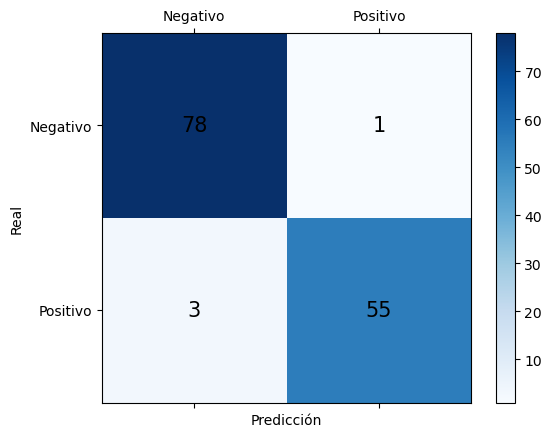

In [62]:
cm = confusion_matrix(y_test, y_pred)

# Se define las etiquetas personalizadas
labels = ['Verdadero Negativo', 'Falso Positivo', 'Falso Negativo', 'Verdadero Positivo']

# Crea el gráfico de la matriz de confusión
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap=plt.cm.Blues)

# Añade la barra de color
plt.colorbar(cax)

# Añade las etiquetas
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black', fontsize=15)

# Configura los ejes
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Negativo', 'Positivo'])
ax.set_yticklabels(['Negativo', 'Positivo'])

# Añade las etiquetas personalizadas
ax.set_xlabel('Predicción')
ax.set_ylabel('Real')
ax.xaxis.set_label_position('bottom')

plt.show()

Precisión:  0.9821428571428571
Memoria:  0.9482758620689655
F1 Score:  0.9649122807017544
Efectividad: 97.1% de efectividad


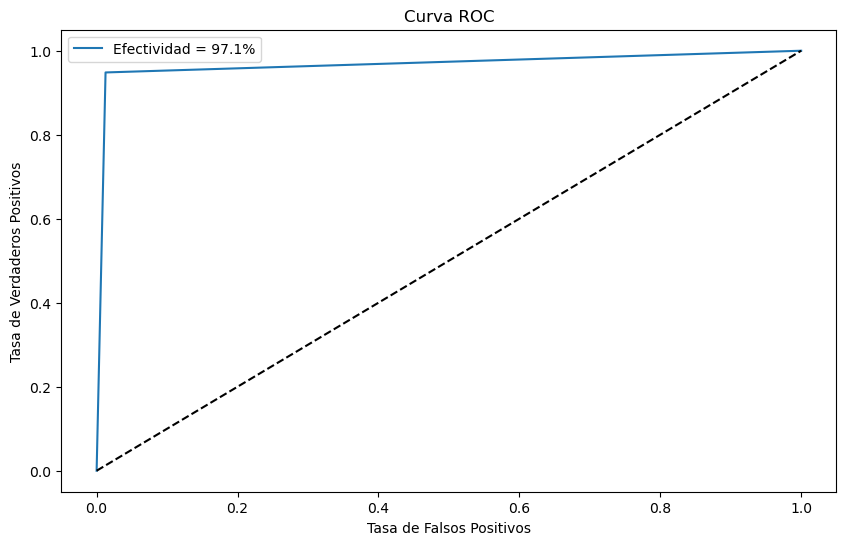

In [63]:
print('Precisión: ', precision_score(y_test, y_pred))
print('Memoria: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print(f"Efectividad: {round(accuracy_score(y_test, y_pred)*100,1 )}% de efectividad")

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = accuracy_score(y_test, y_pred)

# Visualizar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Efectividad = {auc*100:.1f}%')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='best')
plt.show()

# FIN